<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/gaussian-processes/01-fitting-gaussian-processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Mon Sep 30 01:58:35 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!git clone https://github.com/martin-fabbri/colab-notebooks

Cloning into 'colab-notebooks'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 347 (delta 107), reused 75 (delta 28), pack-reused 147
Receiving objects: 100% (347/347), 9.42 MiB | 12.84 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [0]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Sampling from a Gaussian Process

To make this notion of a "distribution over functions" more concrete, let's quickly desmostrate how we obtain realizations from a Gaussian process, which result in an evaluation of a function over a set of points.

In [3]:
a = (10,4)
b = (2,3)
print(np.subtract.outer(a,b))
X = np.arange(3)
Y = X + 0.5
print(Y)
Z = np.subtract.outer(X, Y)
print(Z)

[[8 7]
 [2 1]]
[0.5 1.5 2.5]
[[-0.5 -1.5 -2.5]
 [ 0.5 -0.5 -1.5]
 [ 1.5  0.5 -0.5]]


In [5]:
x = np.array([[[0], [1], [2]]])
print(x.shape)
print(np.squeeze(x).shape)
print(np.squeeze(x))

(1, 3, 1)
(3,)
[0 1 2]


In [0]:
def exponential_cov(x, y, params):
  return params[0] * np.exp(-0.5 * params[1] * np.subtract.outer(x, y)**2)

In [0]:
def conditional(x_new, x, y, params):
  B = exponential_cov(x_new, x, params)
  C = exponential_cov(x, x, params)
  A = exponential_cov(x_new, x_new, params)
  
  mu = np.linalg.inv(C).dot(B.T).T.dot(y)
  sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
  
  return(mu.squeeze(), sigma.squeeze())


σ_0 1.0


<ErrorbarContainer object of 3 artists>

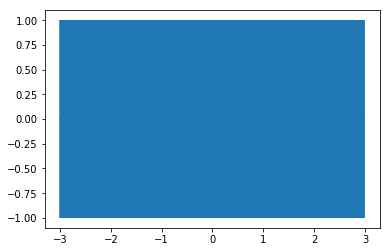

In [11]:
θ = [1, 10]
σ_0 = exponential_cov(0, 0, θ)

print('σ_0', σ_0)

xpts = np.arange(-3, 3, step=0.01)

plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)

In [16]:
x = [1.]
y = [np.random.normal(scale=σ_0)]
y

[0.3804335618736171]

In [0]:
σ_1 = exponential_cov(x, x, θ)
 
def predict(x, data, kernel, params, sigma, t):
  k = [kernel(x, y, params) for y in data]
  Sinv = np.linalg.inv(sigma)
  y_pred = np.dot(k, Sinv).dot(t)
  sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
  return y_pred, sigma_new
 
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, θ, σ_1, y) for i in x_pred]

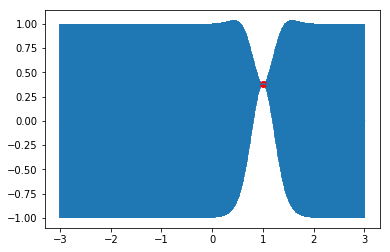

In [18]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")